In [1]:
import cv2
import matplotlib.pyplot as plt
import tensorflow
import keras
import numpy as np

# Machine learning packages
import utils.classifier_utils as clf_util

from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

2024-03-10 11:07:07.768051: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 11:07:07.772104: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-10 11:07:07.821514: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-10 11:07:08.652877: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
# Convert X_train to grayscale
X_train_greyed = np.zeros((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
for i in range(X_train.shape[0]):
    X_train_greyed[i] = cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY)
    
# Convert X_test to grayscale
X_test_greyed = np.zeros((X_test.shape[0], X_test.shape[1], X_test.shape[2]))
for i in range(X_test.shape[0]):
    X_test_greyed[i] = cv2.cvtColor(X_test[i], cv2.COLOR_RGB2GRAY)

In [7]:
# Scaling the features

X_train_scaled = X_train_greyed/255.0
X_test_scaled = X_test_greyed/255.0

In [8]:
# Reshape to 2D (number of images, number of pixels for each flattened image)

X_train_scaled_reshape = X_train_scaled.reshape(-1, 1024)   # (50000, 1024)
X_test_scaled_reshape = X_test_scaled.reshape(-1, 1024)     # (10000, 1024)

In [9]:
# Model test 1
classifier = MLPClassifier(activation = "logistic",
                           hidden_layer_sizes = (20,),
                           max_iter = 1000,
                           random_state = 123)

# Fit the classifier to the training data
NN_classifier = classifier.fit(X_train_scaled_reshape, y_train)

/home/ucloud/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
# Model test 2
classifier = MLPClassifier(activation = "relu",
                           hidden_layer_sizes = (20,),
                           max_iter = 1000,
                           random_state = 123)

NN_classifier = classifier.fit(X_train_scaled_reshape, y_train)

/home/ucloud/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ucloud/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
classifier = MLPClassifier(activation="relu", 
                            hidden_layer_sizes = (20,),  
                            solver = "adam",  # Adam optimizer
                            max_iter = 1000, 
                            random_state = 123
                            )

NN_classifier = classifier.fit(X_train_scaled_reshape, y_train)

In [15]:
# Predicting labels for new, unseen data using the trained classifier
y_pred = NN_classifier.predict(X_test_scaled_reshape)

# Printing the predicted labels for the first 10 samples
print(y_pred[:10])


[4 8 8 0 4 6 8 4 4 6]


In [16]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.3313


              precision    recall  f1-score   support

           0       0.35      0.28      0.31      1000
           1       0.47      0.39      0.42      1000
           2       0.27      0.22      0.24      1000
           3       0.25      0.12      0.16      1000
           4       0.26      0.28      0.27      1000
           5       0.36      0.28      0.31      1000
           6       0.26      0.48      0.34      1000
           7       0.40      0.28      0.33      1000
           8       0.34      0.60      0.44      1000
           9       0.42      0.40      0.41      1000

    accuracy                           0.33     10000
   macro avg       0.34      0.33      0.32     10000
weighted avg       0.34      0.33      0.32     10000



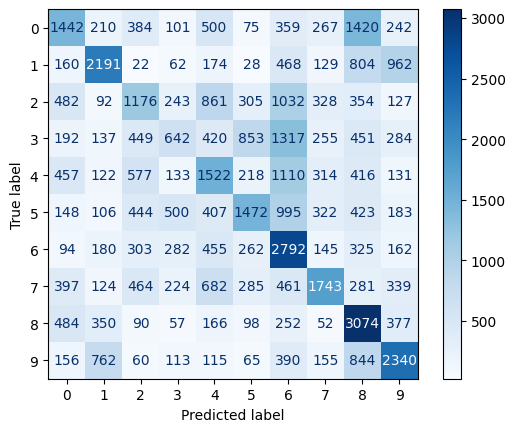

In [17]:
# Evaluate
metrics.ConfusionMatrixDisplay.from_estimator(NN_classifier,
                                            X_train_scaled_reshape,
                                            y_train,
                                            cmap = plt.cm.Blues)

classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)

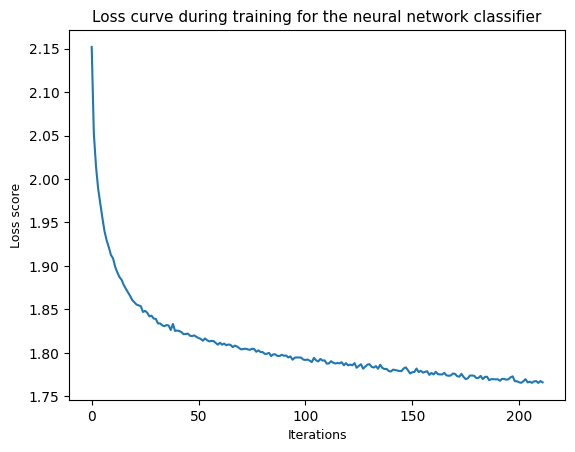

In [18]:
# Plotting a loss curve
plt.plot(NN_classifier.loss_curve_)
plt.title("Loss curve during training for the neural network classifier", fontsize = 11)
plt.xlabel('Iterations', size = 9)
plt.ylabel('Loss score', size = 9)
plt.show()